In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## 1. 시각화

### 1) 산점도

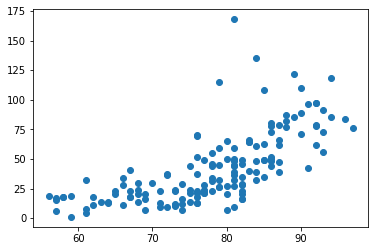

In [6]:
plt.scatter(air['Temp'], air['Ozone'])
plt.show()

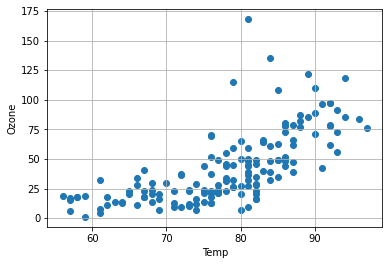

In [7]:
plt.scatter('Temp', 'Ozone', data = air)
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.grid()
plt.show()

- 80도 이후로 Ozone이 급격하게 상승.
- 80도 전후로 outlier를 볼 수 있음.

### 2) pairplot으로 한꺼번에 시각화
- 숫자형 변수들에 대한 산점도

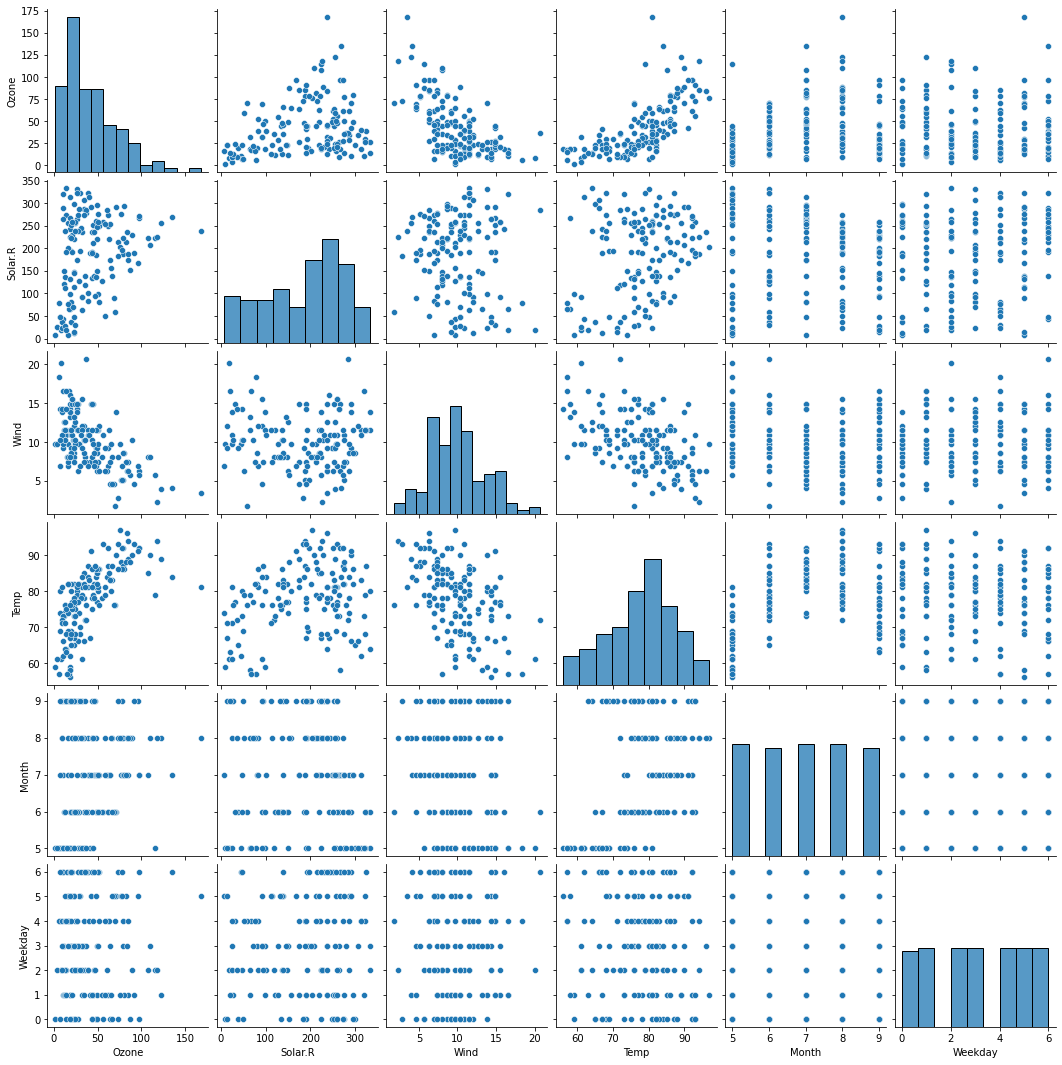

In [9]:
sns.pairplot(air)
plt.show()

### 3) jointplot

- 산점도와 각각의 히스토그램

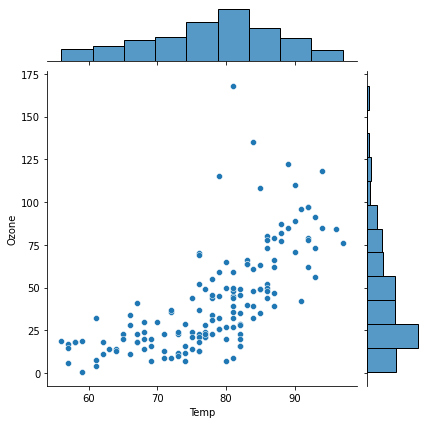

In [10]:
sns.jointplot(x='Temp', y='Ozone', data = air)
plt.show()

## 2. 수치화 (상관분석)

- 공분산, 상관계수
    - 얼마나 직선으로 값들이 모여 있는지를 수치화.
    
- 상관계수 𝑟
    - 공분산을 표준화한 값.
    - -1 ~ 1 사이의 값. (-1, 1에 가까울 수록 강한 상관관계를 나타냄)
    - 값에 NaN이 있으면 계산되지 않음. (.notnull()로 제외하고 수행)

In [11]:
import scipy.stats as spst

In [12]:
# 상관계수, p-value
spst.pearsonr(air['Temp'], air['Ozone'])

(0.6833717861490114, 2.197769800200274e-22)

- p-value
    - 귀무가설 : 상관 관계가 없다.
    - 대립가설 : 상관 관계가 있다.

In [13]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
air.corr()

,Ozone,Solar.R,Wind,Temp,Month,Weekday
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,-0.012900
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,0.071189
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.037313
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.032574
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,0.030261
Weekday,-0.012900,0.071189,0.037313,-0.032574,0.030261,1.000000


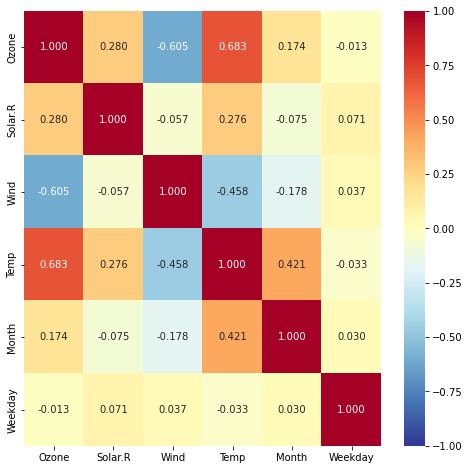

In [14]:
# heatmap으로 시각화
plt.figure(figsize = (8, 8))
sns.heatmap(air.corr(), annot = True, fmt = '.3f', cmap = 'RdYlBu_r', vmin = -1, vmax = 1)
plt.show()

#### 상관계수의 한계

- 분명한 패턴이 보이지만, 거의 상관이 없다고 판단

In [15]:
ds = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/datasaurus.csv")

In [16]:
ds_names = ['dino','x_shape', 'star', 'circle', 'bullseye' ]

In [17]:
for i, d in enumerate(ds_names) :
    temp_ds = ds.loc[ds['dataset']==d]
    corr = spst.pearsonr(temp_ds['x'], temp_ds['y'])
    print(i)
    print('상관계수 : {:.4f},  P-value : {:.4f}'.format(corr[0], corr[1]))
    print('---------------------------------------')

0
상관계수 : -0.0645,  P-value : 0.4459
---------------------------------------
1
상관계수 : -0.0656,  P-value : 0.4381
---------------------------------------
2
상관계수 : -0.0630,  P-value : 0.4566
---------------------------------------
3
상관계수 : -0.0683,  P-value : 0.4190
---------------------------------------
4
상관계수 : -0.0686,  P-value : 0.4173
---------------------------------------


In [18]:
enumerate(ds_names)

0 dino
상관계수 : -0.0645,  P-value : 0.4459


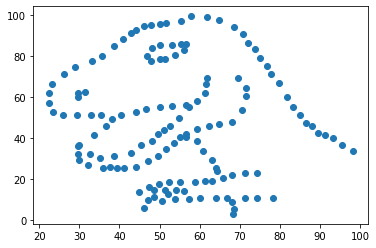

1 x_shape
상관계수 : -0.0656,  P-value : 0.4381


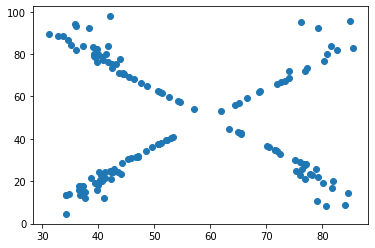

2 star
상관계수 : -0.0630,  P-value : 0.4566


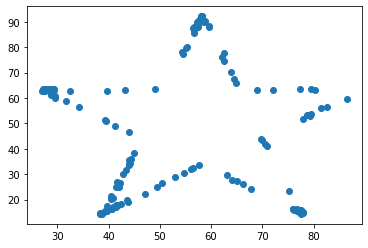

3 circle
상관계수 : -0.0683,  P-value : 0.4190


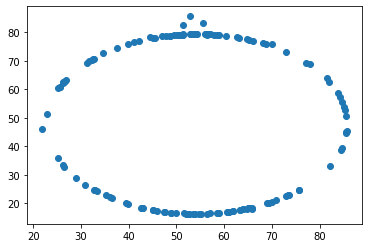

4 bullseye
상관계수 : -0.0686,  P-value : 0.4173


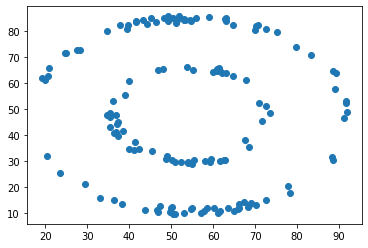

In [19]:
for i,d in enumerate(ds_names) :
    temp_ds = ds.loc[ds['dataset']==d]
    corr = spst.pearsonr(temp_ds['x'], temp_ds['y'])
    print(i, d)
    print('상관계수 : {:.4f},  P-value : {:.4f}'.format(corr[0], corr[1]))
    plt.scatter(temp_ds['x'], temp_ds['y'])
    plt.show()